#Pandas

In [ ]:
from pandas import Series, DataFrame

In [ ]:
import pandas as pd
import numpy as np

#Series

A Series is a one-dimensional array-like object containing an array of data (of any
NumPy data type) and an associated array of data labels, called its index. The simplest
Series is formed from only an array of data:

In [ ]:
obj = Series([4, 7, -5, 3])

In [ ]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

The string representation of a Series displayed interactively shows the index on the left
and the values on the right. Since we did not specify an index for the data, a default
one consisting of the integers 0 through N - 1 (where N is the length of the data) is
created. You can get the array representation and index object of the Series via its values
and index attributes, respectively:

In [ ]:
obj.values

array([ 4,  7, -5,  3])

In [ ]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

Often it will be desirable to create a Series with an index identifying each data point:

In [ ]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [ ]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Compared with a regular NumPy array, you can use values in the index when selecting
single values or a set of values:

In [ ]:
obj2

d    100
b      7
a     -5
c      3
dtype: int64

In [ ]:
obj2['a']

-5

In [ ]:
obj2['d'] = 100

In [ ]:
obj2[['c', 'a', 'd']]

c      3
a     -5
d    100
dtype: int64

In [ ]:
obj2[['d', 'a']]

d    100
a     -5
dtype: int64

NumPy array operations, such as filtering with a boolean array, scalar multiplication,
or applying math functions, will preserve the index-value link:

In [ ]:
obj2

d    100
b      7
a     -5
c      3
dtype: int64

In [ ]:
obj2=obj2[obj2 > 0]

In [ ]:
obj2=obj2 * 2 

In [ ]:
np.exp(obj2)

d    7.225974e+86
b    1.202604e+06
c    4.034288e+02
dtype: float64

Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping
of index values to data values. It can be substituted into many functions that expect a
dict:

In [ ]:
'b' in obj2

True

In [ ]:
'z' in obj2

False

Should you have data contained in a Python dict, you can create a Series from it by
passing Should you have data contained in a Python dict, you can create a Series from it by
passing the dict dict

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 500.0}

In [ ]:
type(sdata)

dict

In [ ]:
obj3 = Series(sdata)

In [ ]:
obj3

Ohio      35000.0
Texas     71000.0
Oregon    16000.0
Utah        500.0
dtype: float64

When only passing a dict, the index in the resulting Series will have the dict’s keys in
sorted order

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [ ]:
sdata

{'Ohio': 35000, 'Oregon': 16000, 'Texas': 71000, 'Utah': 500.0}

In [ ]:
obj4 = Series(sdata, index=states)

In [ ]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
states1 = ['kerala','karnataka','tamil nadu']

In [ ]:
sdata1 = {'kerala': 35000, 'karnataka': 71000, 'delhi': 16000}
sdata1

{'delhi': 16000, 'karnataka': 71000, 'kerala': 35000}

In [ ]:
myseries = Series(sdata1, index=states1)
myseries

kerala        35000.0
karnataka     71000.0
tamil nadu        NaN
dtype: float64

In this case, 3 values found in sdata were placed in the appropriate locations, but since
no value for 'California' was found, it appears as NaN (not a number) which is considered
in pandas to mark missing or NA values. I will use the terms “missing” or “NA”
to refer to missing data. The isnull and notnull functions in pandas should be used to
detect missing data:

In [ ]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [ ]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

A critical Series feature for many applications is that it automatically aligns differentlyindexed
data in arithmetic operations:

In [ ]:
obj3

Ohio      35000.0
Texas     71000.0
Oregon    16000.0
Utah        500.0
dtype: float64

In [ ]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Both the Series object itself and its index have a name attribute, which integrates with
other key areas of pandas functionality

In [ ]:
obj4.name = 'population'
obj4.index.name = 'state'

In [ ]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

A Series’s index can be altered in place by assignment:

In [ ]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

#DataFrame

In [ ]:
from pandas import DataFrame

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}


In [ ]:
frame = DataFrame(data)

In [ ]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


If you specify a sequence of columns, the DataFrame’s columns will be exactly what
you pass:

In [ ]:
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [ ]:
data

{'pop': [1.5, 1.7, 3.6, 2.4, 2.9],
 'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002]}

As with Series, if you pass a column that isn’t contained in data, it will appear with NA
values in the result

In [ ]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],index=['one', 'two', 'three', 'four', 'five'])

In [ ]:
frame2.head(2)

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN


In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by
attribute

In [ ]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [ ]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

Note that the returned Series have the same index as the DataFrame, and their name
attribute has been appropriately set.

Columns can be modified by assignment. For example, the empty 'debt' column could
be assigned a scalar value or an array of values:

In [ ]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [ ]:
np.arange(5.)

array([0., 1., 2., 3., 4.])

In [ ]:
frame2['debt'] = np.arange(5.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


When assigning lists or arrays to a column, the value’s length must match the length
of the DataFrame. If you assign a Series, it will be instead conformed exactly to the
DataFrame’s index, inserting missing values in any holes:

In [ ]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


Assigning a column that doesn’t exist will create a new column. The del keyword will
delete columns as with a dict:

In [ ]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'

In [ ]:
frame2['new']=100

In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [ ]:
del frame2['new']

In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Another common form of data is a nested dict of dicts format:

In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
....: 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [ ]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Of course you can always transpose the result:

In [ ]:
frame3=frame3.T

In [ ]:
frame3

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [ ]:
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

The keys in the inner dicts are unioned and sorted to form the index in the result. This
isn’t true if an explicit index is specified:

In [ ]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Dicts of Series are treated much in the same way:

In [ ]:
frame3

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [ ]:
frame3['Ohio'][:-1]

2001    1.7
2002    3.6
Name: Ohio, dtype: float64

In [ ]:
frame3['Nevada'][:-1]

2001    2.4
2002    2.9
Name: Nevada, dtype: float64

In [ ]:
pdata = {'Ohio': frame3['Ohio'][:-1],
....: 'Nevada': frame3['Nevada'][:2]}

In [ ]:
DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


If a DataFrame’s index and columns have their name attributes set, these will also be
displayed:

In [ ]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame3.index.name = 'year'; 

frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Like Series, the values attribute returns the data contained in the DataFrame as a 2D
ndarray:

In [ ]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [ ]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7]], dtype=object)

#Index Objects

pandas’s Index objects are responsible for holding the axis labels and other metadata
(like the axis name or names). Any array or other sequence of labels used when constructing
a Series or DataFrame is internally converted to an Index:

In [ ]:
obj = Series(range(3), index=['a', 'b', 'c'])

In [ ]:
index = obj.index

In [ ]:
index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
index[1:]

Index(['b', 'c'], dtype='object')

Index objects are immutable and thus can’t be modified by the user:

In [ ]:
index[1] = 'd'

TypeError: ignored

In [ ]:
index = pd.Index(np.arange(3))

In [ ]:
obj2 = Series([1.5, -2.5, 0], index=index)

In [ ]:
obj2.index is index

True

In addition to being array-like, an Index also functions as a fixed-size set:

In [ ]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
'Ohio' in frame3.columns

True

In [ ]:
2003 in frame3.index

False

#Reindexing

A critical method on pandas objects is reindex, which means to create a new object
with the data conformed to a new index

In [ ]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [ ]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [ ]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [ ]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [ ]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [ ]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

#Dropping entries from an axis

In [ ]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [ ]:
new_obj = obj.drop('c')

In [ ]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [ ]:
data = DataFrame(np.arange(16).reshape((4, 4)),
....: index=['Ohio', 'Colorado', 'Utah', 'New York'],
....: columns=['one', 'two', 'three', 'four'])

In [ ]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [ ]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


#Grouping

In [ ]:

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
 'key2' : ['one', 'two', 'one', 'two', 'one'],
 'data1' : np.random.randn(5),
 'data2' : np.random.randn(5)})

In [ ]:
df

,key1,key2,data1,data2
0,a,one,-0.030548,1.960921
1,a,two,1.389471,1.890844
2,b,one,0.585829,-0.226663
3,b,two,1.329867,-0.086651
4,a,one,-0.248737,-0.913297


In [ ]:
grouped = df['data2'].groupby(df['key2'])
grouped.mean()

key2
one    0.273654
two    0.902097
Name: data2, dtype: float64

In [ ]:
df['data1']

0   -0.030548
1    1.389471
2    0.585829
3    1.329867
4   -0.248737
Name: data1, dtype: float64

In [ ]:
grouped = df['data1'].groupby(df['key1'])

In [ ]:
grouped

This grouped variable is now a GroupBy object. It has not actually computed anything
yet except for some intermediate data about the group key df['key1']. The idea is that
this object has all of the information needed to then apply some operation to each of
the groups.

In [ ]:
grouped.head() #NOT USEFUL

0   -0.030548
1    1.389471
2    0.585829
3    1.329867
4   -0.248737
Name: data1, dtype: float64

In [ ]:
grouped.mean() #USEFUL

key1
a    0.370062
b    0.957848
Name: data1, dtype: float64

The important
thing here is that the data (a Series) has been aggregated according to the group key,
producing a new Series that is now indexed by the unique values in the key1 column.
The result index has the name 'key1' because the DataFrame column df['key1'] did.

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).sum()

In [ ]:
means

key1  key2
a     one    -0.279285
      two     1.389471
b     one     0.585829
      two     1.329867
Name: data1, dtype: float64

we grouped the data using two keys, and the resulting Series now has a
hierarchical index consisting of the unique pairs of keys observed

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")


In [ ]:
california_housing_dataframe.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
california_housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,14.295739,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,11.478530,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,0.030000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,7.900000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,11.670000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,17.210000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,356.820000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4b4140048>]],
      dtype=object)

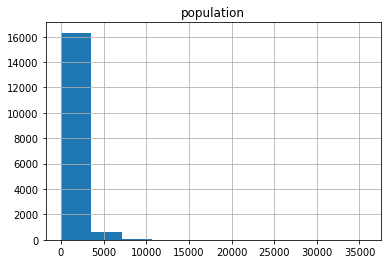

In [ ]:
california_housing_dataframe.hist('population')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4b401ce48>]],
      dtype=object)

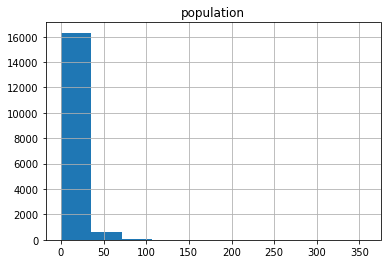

In [ ]:
california_housing_dataframe.hist('population')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4b45b1e48>]],
      dtype=object)

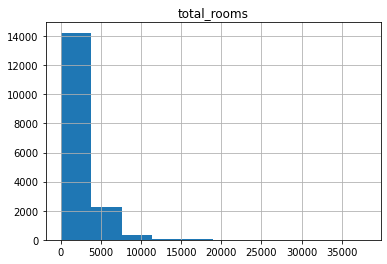

In [ ]:
california_housing_dataframe.hist('total_rooms')

In [ ]:
california_housing_dataframe['population']=california_housing_dataframe['population']/10000*100

In [ ]:
df_2 = df_2.drop('latitude', axis=1)

In [ ]:
df_2.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
0,15.0,5612.0,1283.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,262.0,1.9250,65500.0


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  17000 non-null  float64
 1   total_rooms         17000 non-null  float64
 2   total_bedrooms      17000 non-null  float64
 3   households          17000 non-null  float64
 4   median_income       17000 non-null  float64
 5   median_house_value  17000 non-null  float64
dtypes: float64(6)
memory usage: 797.0 KB


In [ ]:
df_2.describe()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,28.589353,2643.664412,539.410824,501.221941,3.883578,207300.912353
std,12.586937,2179.947071,421.499452,384.520841,1.908157,115983.764387
min,1.000000,2.000000,1.000000,1.000000,0.499900,14999.000000
25%,18.000000,1462.000000,297.000000,282.000000,2.566375,119400.000000
50%,29.000000,2127.000000,434.000000,409.000000,3.544600,180400.000000
75%,37.000000,3151.250000,648.250000,605.250000,4.767000,265000.000000
max,52.000000,37937.000000,6445.000000,6082.000000,15.000100,500001.000000


In [ ]:
!pwd

/content


In [ ]:
cd '/content'

/content


In [ ]:
ls

mycsv.csv  sample_data/


In [ ]:
mycsv = pd.read_csv('/content/mycsv.csv', sep=",")


In [ ]:
mycsv.describe()

,year,pop
count,5.00000,5.000000
mean,2001.20000,2.420000
std,0.83666,0.864292
min,2000.00000,1.500000
25%,2001.00000,1.700000
50%,2001.00000,2.400000
75%,2002.00000,2.900000
max,2002.00000,3.600000


In [ ]:
mycsv = pd.read_csv('/content/mycsv.csv', sep=",")

In [ ]:
mycsv = pd.read_csv('/content/drive/MyDrive/mycsv.csv', sep=",")

In [ ]:
mycsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   5 non-null      object 
 1   year    5 non-null      int64  
 2   pop     5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes
